# Rossman Store Sales

## Requirements.txt

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import pearsonr

## Loading data

In [2]:
# importing train and test dataset
train = pd.read_csv("../Rossmann_Store_Sales/Data/train.csv")
test = pd.read_csv("../Rossmann_Store_Sales/Data/test.csv")
store = pd.read_csv("../Rossmann_Store_Sales/Data/store.csv")

/home/mstevankovic/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#how many datas are in the files:
print("Train dataset: ", train.shape[0], " observations and", train.shape[1], " variables.")
print("Test dataset: ", test.shape[0], " observations and", test.shape[1], " variables.")
print("Store dataset: ", store.shape[0], " observations and", store.shape[1], " variables.")

Train dataset:  1017209  observations and 9  variables.
Test dataset:  41088  observations and 8  variables.
Store dataset:  1115  observations and 10  variables.


# 1. Exploratory Data Analysis

## 1.1. Train dataset

In [4]:
# the first and the last 5 rows of a train dataset
train.head().append(train.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [5]:
# inspecting missing values
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### 1.1.1. Sales variable

In [6]:
len(train[(train['Open'] == 1) & (train['Sales'] == 0)])

# there are 54 observations for which the Store is Opened but there are no Sales.
# Should inspect those observations, maybe there is pattern in that data, maybe some external factor!

54

In [7]:
len(train[(train['Open'] == 0) & (train['Sales'] == 0)])
# there are 172.817 opservations in which one of the stores was closed.
# The idea is to exclude these observations from the dataset, because the prediction errors made for these
# datapoints largely contribute to the total error.

172817

In [8]:
len(train[(train.Open == 1) & (train.Sales > 0)])
# There are 844.338 opservations in which the store was Open and Sales were greater than 0

844338

In [9]:
train_opened = train[(train.Open == 1)]
round(train_opened.Sales.describe(), 2)

count    844392.00
mean       6955.51
std        3104.21
min           0.00
25%        4859.00
50%        6369.00
75%        8360.00
max       41551.00
Name: Sales, dtype: float64

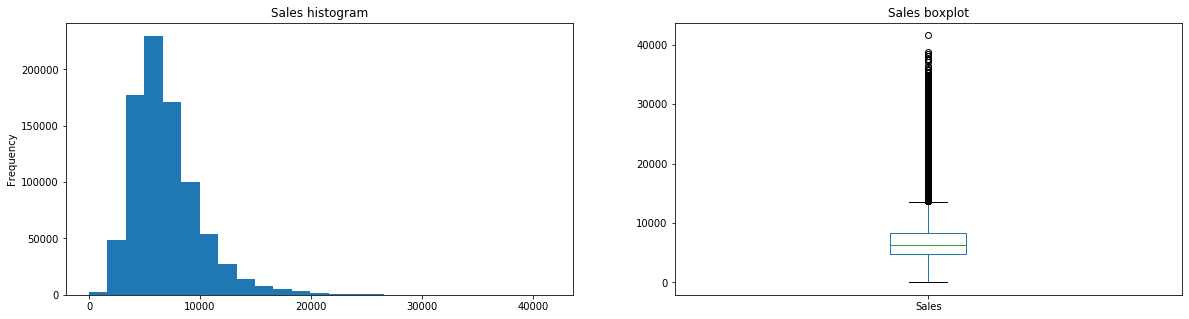

In [10]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

train_opened.Sales.plot(kind="hist",title="Sales histogram",bins=25,ax=ax[0])
train_opened.Sales.plot.box(title="Sales boxplot",ax=ax[1])

### 1.1.2. Customers variable

In [11]:
train.Customers.head().append(train.Customers.tail())

0           555
1           625
2           821
3          1498
4           559
1017204       0
1017205       0
1017206       0
1017207       0
1017208       0
Name: Customers, dtype: int64

In [12]:
train.Customers.describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

In [13]:
train_opened.Customers.describe()

count    844392.000000
mean        762.728395
std         401.227674
min           0.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

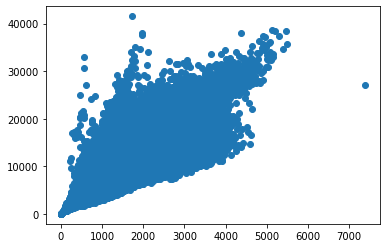

Pearson's correlation between variables Customers~Sales: 0.8947


In [14]:
plt.scatter(train.Customers, train.Sales)
plt.show()

corr = round(pearsonr(train.Customers, train.Sales)[0], 4)

print(f"Pearson's correlation between variables Customers~Sales: {corr}")

# as it is shown in correlation plot, there is a strong positive correlation between 
# Number of Customers and realized Sales.
# Pearson's correlation between these 2 varibles is 0.8947

# Variable Customer represents potentially good predictor.

### 1.1.3. Open variable

In [15]:
train[train.Open == 0].Store.count()
# Stores have been closed 172.817 days/times during the observation period (during these 3 years)
# Remove observations were train.Open==0 ?

172817

In [16]:
print(len(train[(train.Open == 0) & (train.StateHoliday != 0)& (train.StateHoliday != '0')]))
print(len(train[(train.Open == 0) & (train.SchoolHoliday != 0)]))

30140
18264


In [17]:
train.SchoolHoliday.unique()

array([1, 0])

## 1.2. Stores Dataset

In [18]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [19]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [20]:
store.shape[0]

1115

In [21]:
# Counting missing values
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### 1.2.1. CompetitionDistance

In [22]:
# CompetitionDistance missing values
store.CompetitionDistance.head()
store[pd.isnull(store.CompetitionDistance)]

# Simply missing values, no pattern in behaviour, maybe try to impute missing values?
# Impute median value or mean value?
# If there are outpliers, imputing median value makes more sense!

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [23]:
from matplotlib.cbook import boxplot_stats  
len(boxplot_stats(store.CompetitionDistance[store.CompetitionDistance.isnull() == False]).pop(0)['fliers'])

# boxplot_stats() shows 108 outliers, 108 outlies out of 1115 observations, almost 10% of outliers in store dataset

108

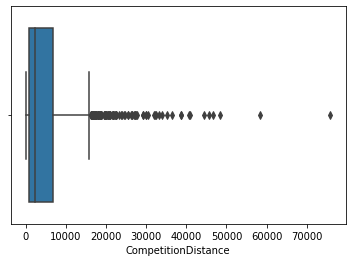

In [24]:
sns.boxplot(store.CompetitionDistance[store.CompetitionDistance.isnull() == False])

In [25]:
round(store.CompetitionDistance.describe(), 2)

count     1112.00
mean      5404.90
std       7663.17
min         20.00
25%        717.50
50%       2325.00
75%       6882.50
max      75860.00
Name: CompetitionDistance, dtype: float64

In [26]:
store[store.CompetitionDistance > 7000].shape
# there are 271 stores where the nearest competition is further than 7 kilometers
print(f"Median value is {round(store.CompetitionDistance.mean() / store.CompetitionDistance.median(), 2)} times less than mean value")

Median value is 2.32 times less than mean value


In [27]:
# Fill in the missing values for variable CompetitionDistance
# TO DO

### 1.2.2. CompetitionOpenSinceMonth & CompetitionOpenSinceYear

In [28]:
# CompetitionOpenSinceMonth - inspecting missing values
print(f"Number of missing values for variable CompetitionOpenSinceMonth: {len(store[pd.isnull(store.CompetitionOpenSinceMonth)])}")
store[pd.isnull(store.CompetitionOpenSinceMonth)].head()

# There are 354 missing values for variable CompetitionOpenSinceMonth.
# Observations with missing values for former variable have no other 'faulty' data, 
# therefore NaN values are probably imputed insted of number 0 and NaN values probably mean 
# that there was no new Competitors in the previous Month.
# NaN values will be replaced with 0

Number of missing values for variable CompetitionOpenSinceMonth: 354


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [29]:
# CompetitionOpenSinceYear - inspecting missing values
print(f"Number of missing values for variable CompetitionOpenSinceYear: {len(store[pd.isnull(store.CompetitionOpenSinceYear)])}")
store[pd.isnull(store.CompetitionOpenSinceYear)].head()

# There are 354 missing values for variable CompetitionOpenSinceYear.
# Again, observations with missing values for observing variable have no other 'faulty' data, 
# therefore NaN values are probably imputed insted of number 0 and NaN values probably mean 
# that there was no new Competitors in the previous year for the observing store.
# Like in the previous case. NaN values will be replaced with 0

Number of missing values for variable CompetitionOpenSinceYear: 354


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [30]:
# As there are 354 missing values for both variables CompetitionOpenSinceMonth and CompetitionOpenSinceYear,
# it would be a good idea to check whether the same observations have missing values fot both variables
print(f"Number of observations missing values for both variables CompetitionOpenSinceMonth and CompetitionOpenSinceYear: {len(store[(pd.isnull(store.CompetitionOpenSinceMonth))&(pd.isnull(store.CompetitionOpenSinceYear))])}")

Number of observations missing values for both variables CompetitionOpenSinceMonth and CompetitionOpenSinceYear: 354


In [31]:
# Fill in the missing values for variables CompetitionOpenSinceMonth and CompetitionOpenSinceYear with 0
store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
store.CompetitionOpenSinceYear.fillna(0, inplace = True)

### 1.2.3. Promo2

In [32]:
store.Promo2.unique()

array([0, 1])

In [33]:
store.Promo2.dtype
# Promo2 is a numerical variable, but it should be categorical, therefore it will be changeg to categorical variable

dtype('int64')

In [34]:
store.Promo2 = store.Promo2.astype('category')

In [35]:
store.Promo2.describe()
# 2 unique values, 0 and 1, meaning there is (not) a promo2 included.
# No missing values for this variable

count     1115
unique       2
top          1
freq       571
Name: Promo2, dtype: int64

In [36]:
store.groupby(by="Promo2", axis=0).Store.count()
# there are 1115 observations/stores in a dataset, 544 of them runned Promo2, 571 did not

Promo2
0    544
1    571
Name: Store, dtype: int64

### 1.2.4. Promo2SinceWeek, Promo2SinceYear, PromoInterval

In [37]:
# Promo2SinceWeek - inspecting missing values
len(store[pd.isnull(store.Promo2SinceWeek)])
# Since in chapter 1.2.3. Promo2 variable had value 0 for 544 observations, 
# and Promo2SinceWeek has 544 missing values, maybe Promo2SinceWeek is missing values because
# missing value is imputed instead of 0 meaning that if there is no Promo2 runed in a store, then Promo2 actually
# never started in that store.
# The same logic could be applied for variables Promo2SinceYear, PromoInterval
# Since NaN in these 3 variables represents that there was no Promo2 running in observed stores,
# NaN values will be replaces with 0

544

In [38]:
store.groupby(by="Promo2",axis=0)['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'].count()

,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Promo2,,,
0,0,0,0
1,571,571,571


In [39]:
# Replacing missing/NaN values in variables Promo2SinceWeek, Promo2SinceYear, PromoInterval with 0
store.Promo2SinceWeek.fillna(0, inplace = True)
store.Promo2SinceYear.fillna(0, inplace = True)
store.PromoInterval.fillna(0, inplace = True)

## 1.3. Join Train and Stores Dataset

In [40]:
# Joining 2 datasets so that full potential of the data can be used
# When datasets are joing via left join, there are 1.017.209 observations in a train_ds
# When datasets are join via inner join, there are 1.017.209 observations in a train_ds
# Conclusion: it makes no difference which method is used
train_ds = pd.merge(train,right=store,how="left",on="Store")

In [41]:
train_ds.shape

(1017209, 18)

In [42]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    1017209 non-null float64
CompetitionOpenSinceYear     1017209 non-null float64
Promo2                       1017209 non-null category
Promo2SinceWeek              1017209 non-null float64
Promo2SinceYear              1017209 non

### 1.3.1. Sales over Store Types

In [43]:
# Closely looking at distribution of Sales variable over different Store Types
round(train_ds.groupby('StoreType')['Sales'].describe(), 2)

# Store type 'b' has almost double average sales comparing to other store types.
# One more thing that is making difference between Store Type 'b' and other store types is that store 'b' is 
# rare (not common) store type, because there are only 15.830 observations of this type.
# Further inspection about overall sum of Sales variable across store types is required,
# it would be interesting to see how well does store type 'b' rank in that case.
# Store Type 'a' has the most stores in dataset.

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.0,5738.18,3964.03,0.0,3508.0,5618.0,7860.00,41551.0
b,15830.0,10058.84,5280.53,0.0,6227.0,9025.5,13082.75,38722.0
c,136840.0,5723.63,3721.70,0.0,3789.0,5766.0,7849.00,31448.0
d,312912.0,5641.82,3473.39,0.0,3986.0,5826.0,7691.00,38037.0


In [44]:
# Inspecting overall sum of Sales variable across different store types
train_ds.groupby('StoreType')['Sales'].sum().sort_values(ascending=False)

# Store Type 'a' is the most selling store type. 
# Store Type 'b' is the least selling store type, even though average sales were the highest one, quantity of 
# store type 'a' had a greater impact on overall selling results. 

StoreType
a    3165334859
d    1765392943
c     783221426
b     159231395
Name: Sales, dtype: int64

In [45]:
# Inspecting distribution of Customer variable across different store types
train_ds.groupby('StoreType')['Customers'].sum().sort_values(ascending=False)

# Store Type 'a' is the most crowded store type. The second most crowded store, and the second store with 
# highest sales is store type 'd'.

StoreType
a    363541434
d    156904995
c     92129705
b     31465621
Name: Customers, dtype: int64

In [46]:
# There is a huge impact of number of Store Types on overall result, so it would be interesting to see
# the average sales per customers across Store Types
train_ds['Sales_per_Customer'] = train_ds.Sales / train_ds.Customers

In [47]:
# Inspecting Sales per Customer variable over different store types
train_ds.groupby('StoreType').Sales_per_Customer.mean().sort_values(ascending=False)

# Store Type 'a' has the greates number of stores, has the biggest sales and has the greatest number of customers.
# However, Store Type 'd' has the best average Sales per Customer.

StoreType
d    11.277862
a     8.846277
c     8.626227
b     5.133097
Name: Sales_per_Customer, dtype: float64

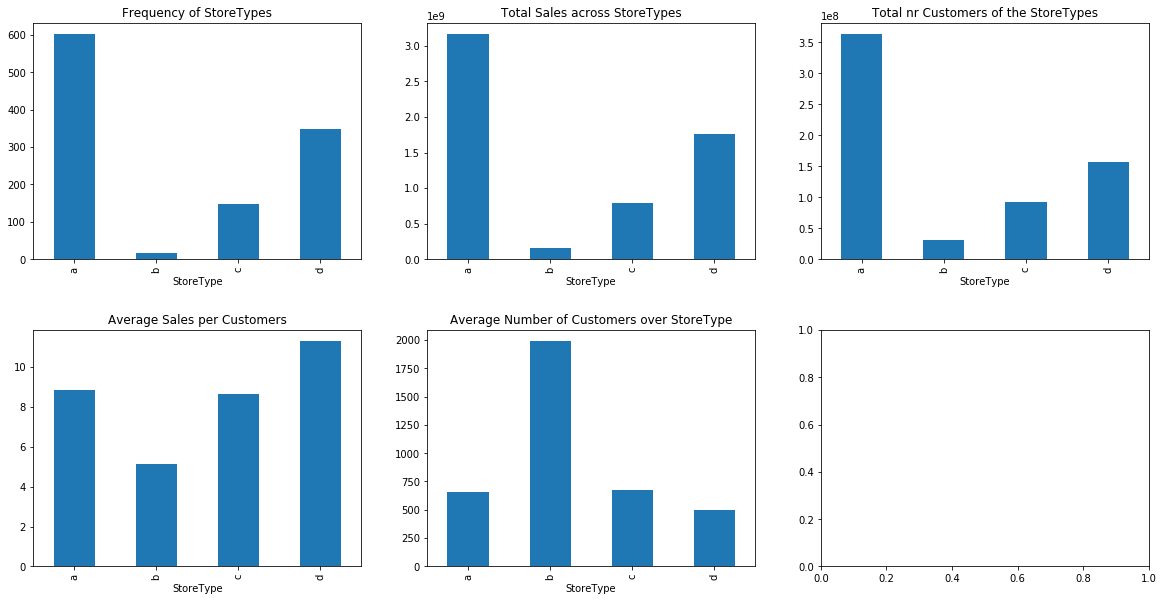

In [48]:
# Visual inspection of Sales across Store Types
f, ax = plt.subplots(2, 3, figsize = (20,10))

store.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Frequency of StoreTypes")
train_ds.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales across StoreTypes")
train_ds.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
train_ds.groupby("StoreType")["Sales_per_Customer"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales per Customers")
train_ds.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Number of Customers over StoreType")

# plt.legend(loc="best")
plt.subplots_adjust(hspace = 0.3)
plt.show()

In [49]:
# TO DO: add colors to barplot!

### 1.3.2. Promotion

In [50]:
# Extracting Day, Month, Year columns out of Date column
train_ds.Date = train_ds.Date.astype("datetime64[ns]")

train_ds["Month"] = train_ds.Date.dt.month
train_ds["Year"] = train_ds.Date.dt.year
train_ds["Day"] = train_ds.Date.dt.day

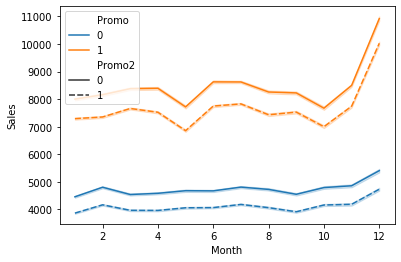

In [51]:
# Basic understanding of Promo variable impact on Sales variable is that, if the store is having a promotion,
# there should be higher sales in that store.
sns.lineplot(data=train_ds,x="Month",y="Sales",hue="Promo",legend="full",style="Promo2")

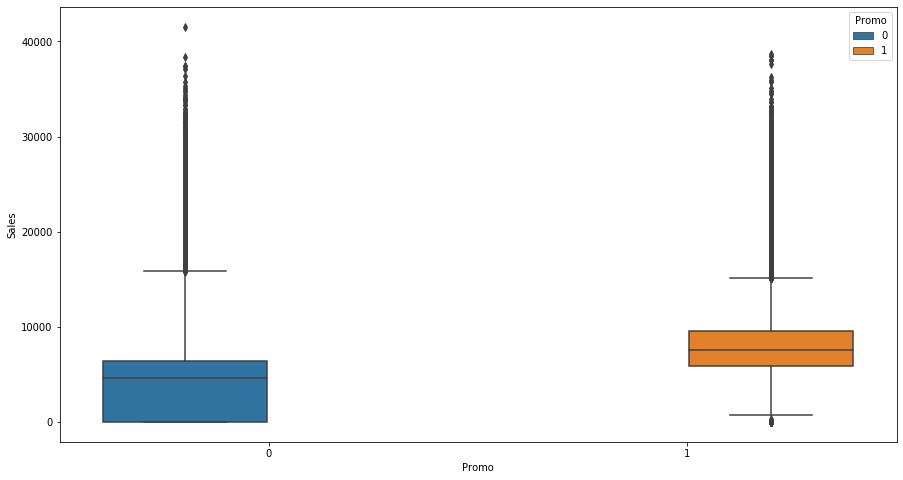

In [64]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Promo", y="Sales", hue="Promo", data=train_ds)
# Very simple boxplot showing distribution of Sales variable depending on Promo variable

In [75]:
train_ds[train_ds.Promo==1].Sales.describe()

count    388080.000000
mean       7991.152046
std        3419.025495
min           0.000000
25%        5922.000000
50%        7553.000000
75%        9603.000000
max       38722.000000
Name: Sales, dtype: float64

In [76]:
train_ds[train_ds.Promo==0].Sales.describe()

count    629129.000000
mean       4406.050805
std        3442.450020
min           0.000000
25%           0.000000
50%        4622.000000
75%        6367.000000
max       41551.000000
Name: Sales, dtype: float64

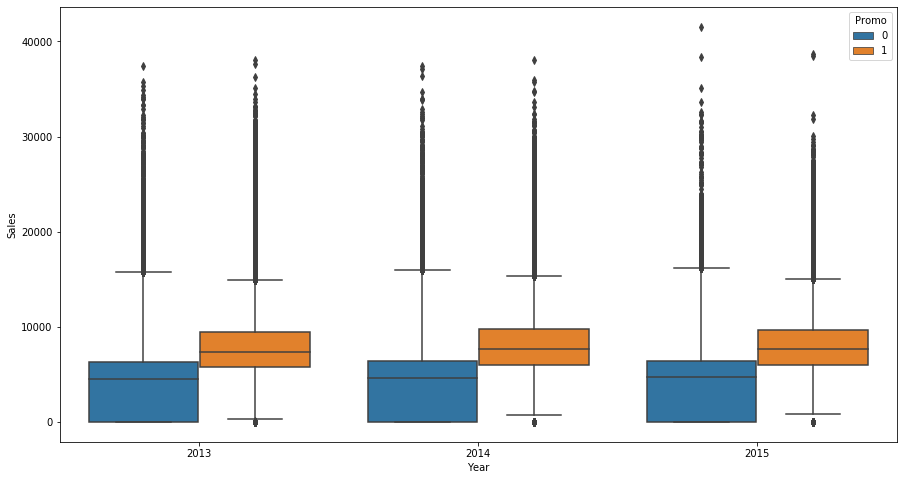

In [65]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Year", y="Sales", hue="Promo", data=train_ds)

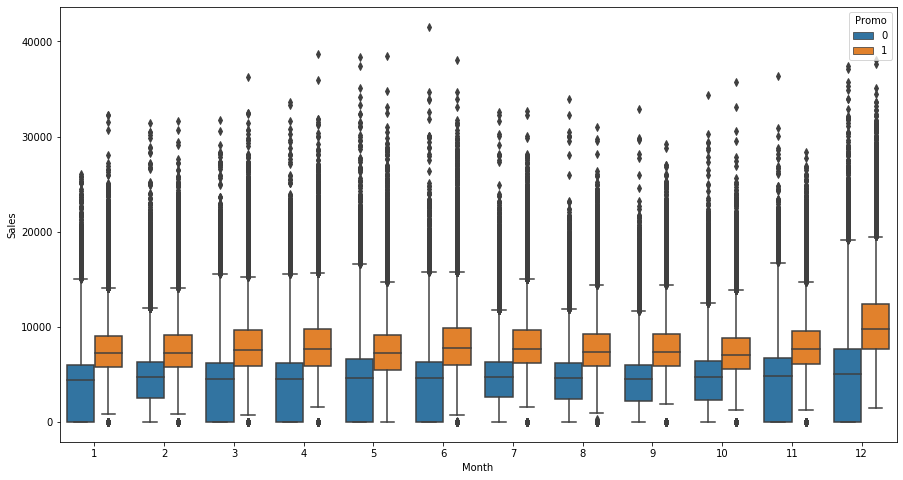

In [66]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Month", y="Sales", hue="Promo", data=train_ds)

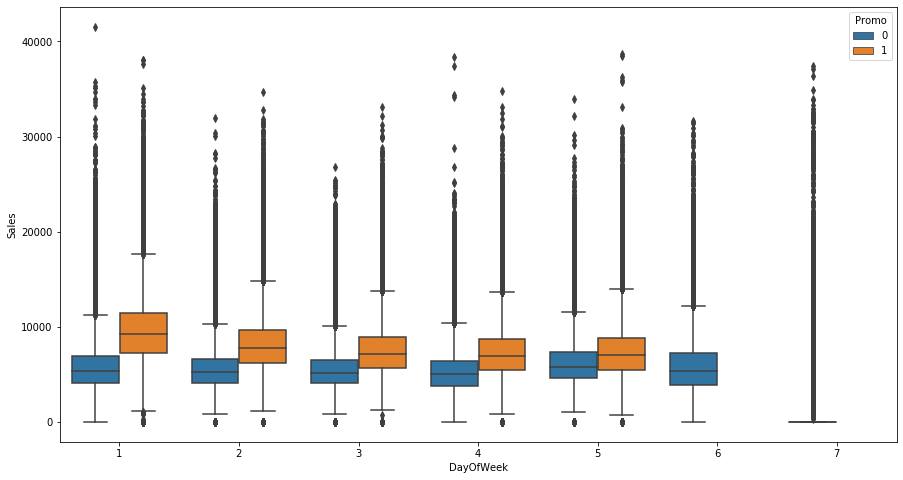

In [67]:
plt.figure(figsize=(15,8))
sns.boxplot(x="DayOfWeek", y="Sales", hue="Promo", data=train_ds)

# From the graph, there can be seen that during weekend there are no promotions.
# It is neccessary to run some further analysis to confirm this

In [70]:
train_ds.groupby("DayOfWeek")['Promo'].sum()
# There are no promotions during weekend!

DayOfWeek
1    77760
2    77580
3    77580
4    77580
5    77580
6        0
7        0
Name: Promo, dtype: int64

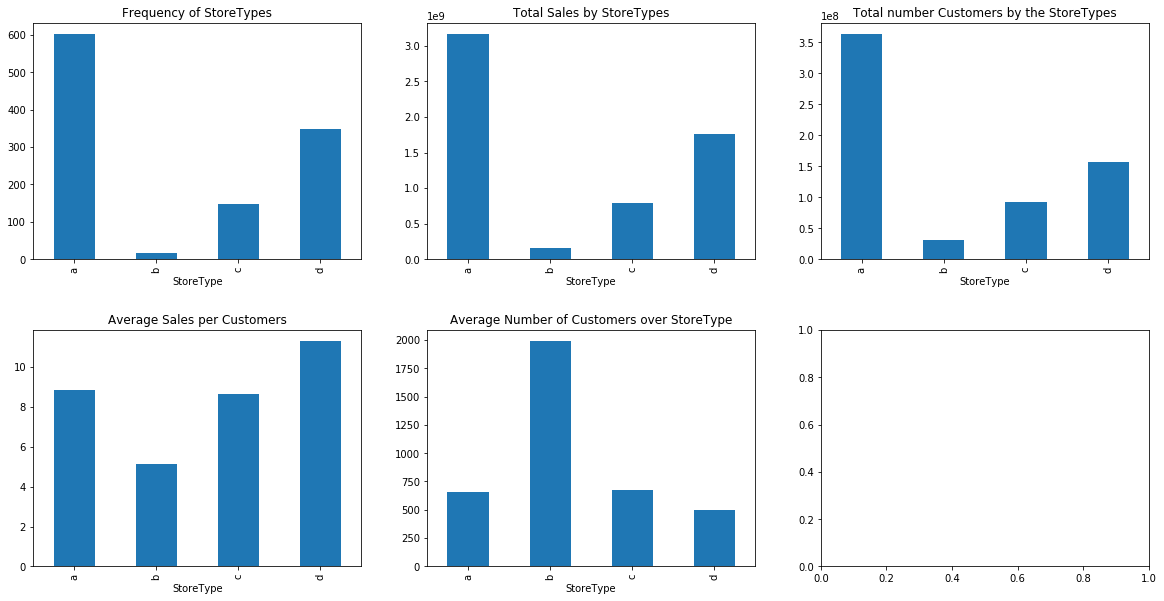

In [56]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Frequency of StoreTypes")
train_ds.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales by StoreTypes")
train_ds.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total number Customers by the StoreTypes")
train_ds.groupby("StoreType")["Sales_per_Customer"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales per Customers")
train_ds.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Number of Customers over StoreType")

# plt.legend(loc="best")
plt.subplots_adjust(hspace = 0.3)
plt.show()

In [53]:
# TO DO!!!!

### 1.3.3. DayOfWeek

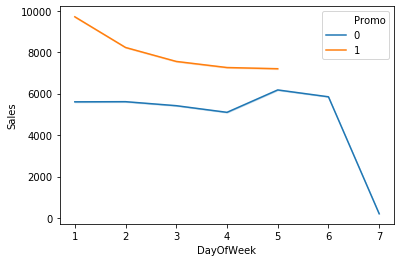

In [54]:
# Sales on week days
sns.lineplot(data=train_ds,x="DayOfWeek",y="Sales",hue="Promo",legend="full")

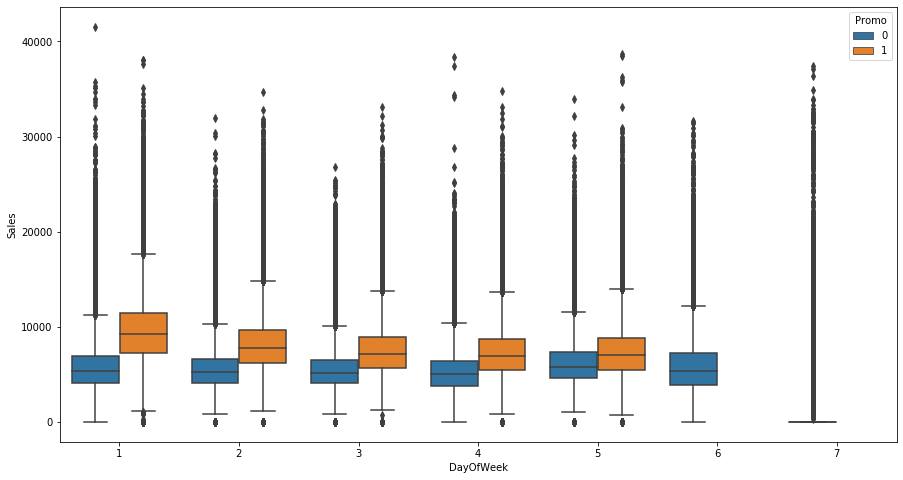

In [60]:
plt.figure(figsize=(15,8))
sns.boxplot(x="DayOfWeek", y="Sales", hue="Promo", data=train_ds)